In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("PlayTennis.csv")
data.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [3]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder, OrdinalEncoder

In [14]:
outlook_encoder = OrdinalEncoder()
data['Outlook'] = outlook_encoder.fit_transform(data[['Outlook']])


In [13]:
temperature_encoder = OrdinalEncoder()
data['Temperature'] = temperature_encoder.fit_transform(data[['Temperature']])


In [12]:
Humidity_encoder = OrdinalEncoder()
data['Humidity'] = Humidity_encoder.fit_transform(data[['Humidity']])


In [11]:
Wind_encoder = OrdinalEncoder()
data['Wind'] = Wind_encoder.fit_transform(data[['Wind']])

In [10]:
play_encoder = OrdinalEncoder()
data['Play Tennis'] = play_encoder.fit_transform(data[['Play Tennis']])
data

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2.0,1.0,0.0,1.0,0.0
1,2.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0
3,1.0,2.0,0.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0
5,1.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,1.0
7,2.0,2.0,0.0,1.0,0.0
8,2.0,0.0,1.0,1.0,1.0
9,1.0,2.0,1.0,1.0,1.0


In [19]:
x = data.drop('Play Tennis', axis=1) 
y = data['Play Tennis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
clf= DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy with gini index is:", accuracy_score(y_test, y_pred))
print("cm:", confusion_matrix(y_test, y_pred))
print ( classification_report(y_test, y_pred))

Accuracy with gini index is: 1.0
cm: [[1 0]
 [0 2]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



[Text(0.4, 0.9, 'Outlook <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = Yes'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'Humidity <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = No'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'Wind <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.3, 0.3, 'Outlook <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.8, 0.5, 'Wind <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Yes'),
 Text(0.7, 0.3, 'Outlook <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue =

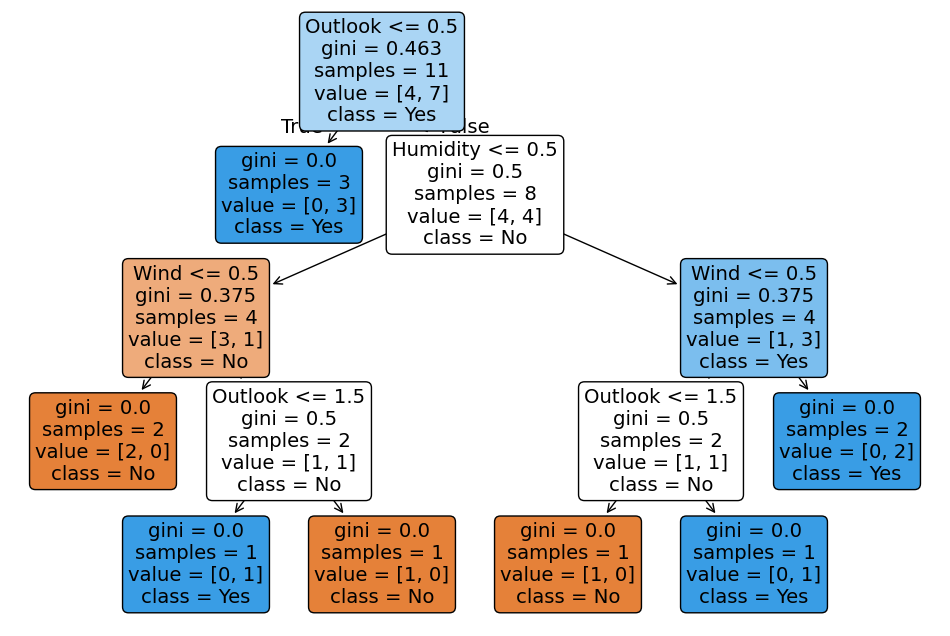

In [25]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=x.columns, class_names=play_encoder.categories_[0], rounded=True)

In [30]:
clf1 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf1.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
y_pred1 = clf1.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy with entropy index is:", accuracy_score(y_test, y_pred1))
print("cm:", confusion_matrix(y_test, y_pred1))
print ( classification_report(y_test, y_pred1))

Accuracy with entropy index is: 1.0
cm: [[1 0]
 [0 2]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



[Text(0.4, 0.9, 'Outlook <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]\nclass = Yes'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'Humidity <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = No'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'Wind <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = No'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No'),
 Text(0.3, 0.3, 'Outlook <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.8, 0.5, 'Wind <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = Yes'),
 Text(0.7, 0.3, 'Outlook <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.6, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.8, 0.1, 

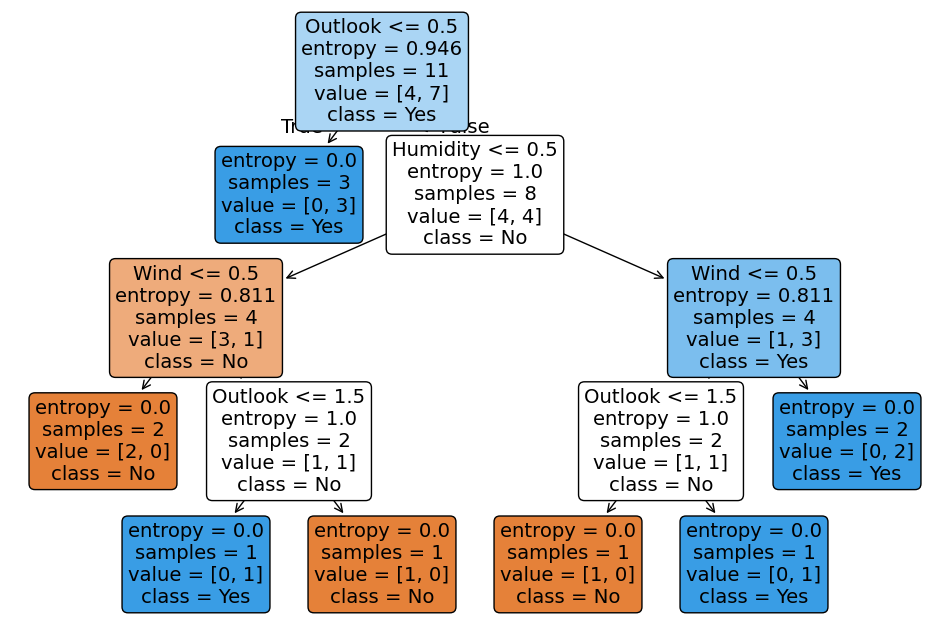

In [32]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf1, filled=True, feature_names=x.columns, class_names=play_encoder.categories_[0], rounded=True)